<a href="https://colab.research.google.com/github/Dexne/Pattern_Recognition/blob/main/10_Red_RBF_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimeinto de Patrones**

Red RBF-NN
Importamos la paquetería necesaria

In [1]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt

# Paqueterias de ayuda para la RBF
from scipy.spatial import distance
from sklearn.cluster import KMeans

# Paqueterías para crear datasets de prueba
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder

creamos la clase de la red neuronal RBF-NN

In [2]:
class RBFNN:
    """
        Radial Basis Function Neural Network
    """

    def __init__(self, n_hidden):
        self.nh = n_hidden

    def predict(self, X):
        G = np.exp(-(distance.cdist(X, self.C)**2) / self.sigma)
        return G.dot(self.w)

    def predict_class(self, X):
        G = np.exp(-(distance.cdist(X, self.C)**2) / self.sigma)
        return np.argmax(G.dot(self.w), axis=1)

    def train(self, X, Y):
        self.ni, self.no = X.shape[1], Y.shape[1]
        km = KMeans(n_clusters=self.nh).fit(X)
        self.C =  km.cluster_centers_
        self.sigma = (self.C.max() - self.C.min()) / np.sqrt(2*self.nh)
        G = np.exp(-(distance.cdist(X, self.C)**2) / self.sigma)
        self.w = np.linalg.pinv(G) @ Y

**Regresión**

Define el numero de muestras del problema

In [3]:
# número de muestras
p = 700

De los siguientes dos bloques solo corre uno para definir el problema

In [4]:
# Problema 1
xl = -5
xu = 5
x = np.linspace(xl, xu, p).reshape(-1, 1)
y = 2 * np.cos(x) + np.sin(3*x) + 5 + 0.2*np.random.randn(*x.shape)

In [ ]:
# Problema 2
xl = 0
xu = 10
x = np.linspace(xl, xu, p).reshape(-1, 1)
y = (0.1 * x - 0.5) * np.sin( 1 / (0.1 * x - 0.5)

Crea y entrena tu red

In [9]:
# Crear y entrenar red
neurons = 2
net = RBFNN(neurons)
net.train(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dibuja la respuesta de tu red

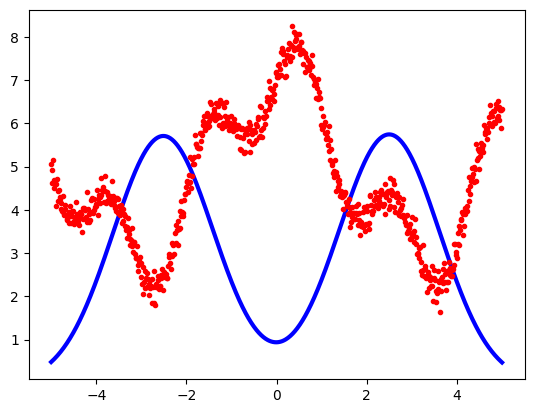

In [10]:
# Propagar la red
xnew = np.linspace(xl, xu, 1000).reshape(-1,1)
ynew = net.predict(xnew)

# Dibujar puntos
plt.plot(xnew, ynew, '-b', linewidth=3)
plt.plot(x,y, '.r', linewidth=0.1)
plt.show()

**Clasificación**

Define los parámetros del problema

In [11]:
# número de muestras
p = 700
noise = 0.

In [12]:
x, y = make_moons(p, noise=noise)
OHE = OneHotEncoder()
y_encoded = OHE.fit_transform(y[:, None]).toarray()

crea y entrena la red

In [13]:
neurons = 2
net = RBFNN(neurons)
net.train(x, y_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dibuja la respuesta de la red

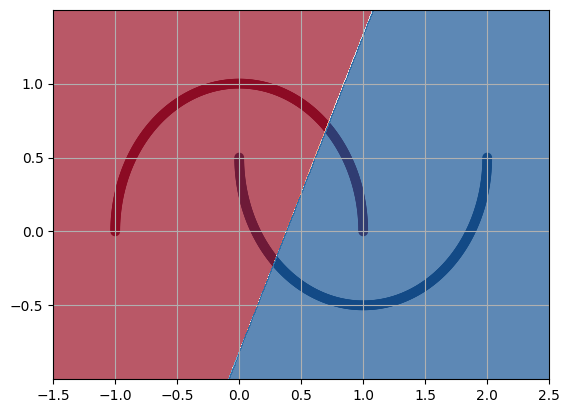

In [14]:
plt.figure()
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdBu)
xmin, ymin = np.min(x[:,0]) - 0.5, np.min(x[:,1]) - 0.5
xmax, ymax = np.max(x[:,0]) + 0.5, np.max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.linspace(xmin,xmax, 500),
                     np.linspace(ymin,ymax, 500))

data = np.concatenate((xx.ravel().reshape(-1,1),
                       yy.ravel().reshape(-1,1)), axis=1)

zz = net.predict_class(data)
zz = zz.reshape(xx.shape)
plt.contourf(xx,yy,zz, alpha=0.7, cmap=plt.cm.RdBu)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.grid()
plt.show()